In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from robust_loss_pytorch import distribution
import torch
plt.style.use('ggplot')

In [3]:
dist = distribution.Distribution()

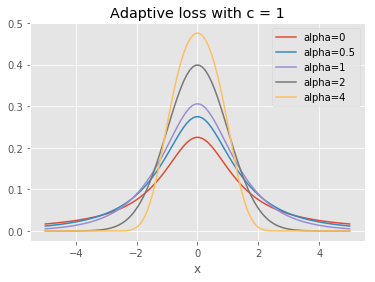

In [20]:
alpha = [0,0.5,1,2,4]
for a in alpha:
    y = dist.nllfun(torch.Tensor(np.linspace(-5, 5, 100)), float(a), 1.).data.numpy()
    sns.lineplot(np.linspace(-5, 5, 100), np.exp(-y), label='alpha='+str(a))
plt.xlabel('x')
plt.title('Adaptive loss with c = 1')
plt.savefig('fig/loss_alpha.png')


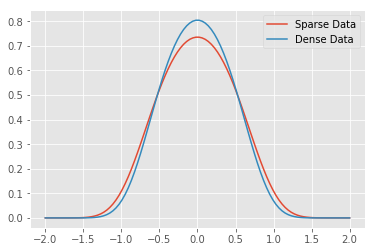

In [24]:
alpha=0.526821  
scale=0.646592
y = dist.nllfun(torch.Tensor(np.linspace(-2, 2, 100)), float(a), float(scale)).data.numpy()
sns.lineplot(np.linspace(-2, 2, 100), np.exp(-y), label='Sparse Data')

alpha=0.452559  
scale=0.591100
y = dist.nllfun(torch.Tensor(np.linspace(-2, 2, 100)), float(a), float(scale)).data.numpy()
sns.lineplot(np.linspace(-2, 2, 100), np.exp(-y), label='Dense Data')
plt.savefig('loss_sparsity.png')

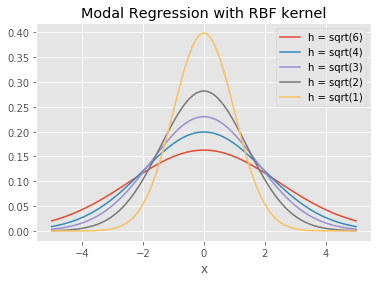

In [104]:
from sklearn.neighbors import KernelDensity
def kernerl(x, h):
    sigma = np.sqrt(h)
    const = 1/(sigma*np.sqrt(2*np.pi))
    return const * np.exp(-(x/sigma)**2/2)
for a in [6,4,3,2,1]:
    x = np.linspace(-5, 5, 100)
    sns.lineplot(np.linspace(-5, 5, 100), [kernerl(y,a) for y in x], label='h = sqrt('+str(a)+')')


plt.xlabel('x')
plt.title('Modal Regression with RBF kernel')
plt.savefig('fig/loss_h.png')

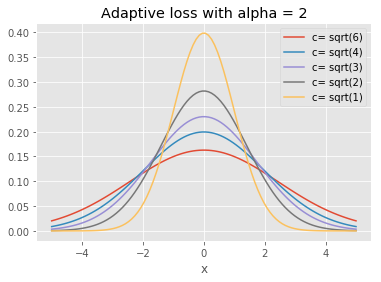

In [105]:
alpha = [6,4,3,2,1]
for a in alpha:
    a_ = np.sqrt(a)
    y = dist.nllfun(torch.Tensor(np.linspace(-5, 5, 100)), float(2), float(a_)).data.numpy()
    sns.lineplot(np.linspace(-5, 5, 100), np.exp(-y), label='c= sqrt('+str(a)+')')
plt.xlabel('x')
plt.title('Adaptive loss with alpha = 2')
plt.savefig('fig/loss_c.png')